In [1]:
%matplotlib inline
from util.VisualizeDataset import VisualizeDataset
from Chapter3.DataTransformation import LowPassFilter
from Chapter3.DataTransformation import PrincipalComponentAnalysis
from Chapter3.ImputationMissingValues import ImputationMissingValues
from Chapter3.KalmanFilters import KalmanFilters
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

In [2]:
dataset_path = './intermediate_datafiles/'
dataset = pd.read_csv(dataset_path + 'chapter3_result_outliers.csv', index_col=0)
dataset.index = dataset.index.to_datetime()
DataViz = VisualizeDataset()
# Computer the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

In [ ]:
linreg = LinearRegression()


#All features execpt hart rate
#train_data_x =data_without_null[['acc_phone_x','acc_phone_y','acc_phone_z']]
#Only hart rate
train_data_x = dataset[['acc_phone_x','acc_phone_y','acc_phone_z']][~dataset.hr_watch_rate.isnull()]

train_data_y = dataset['hr_watch_rate'][~dataset.hr_watch_rate.isnull()]
#train_data_x.drop('hr_watch_rate', axis=1, inplace=True)

#training
linreg.fit(train_data_x,train_data_y)

#predict
test_data = dataset[['acc_phone_x','acc_phone_y','acc_phone_z']][dataset.hr_watch_rate.isnull()]
hr_predicted = pd.DataFrame(linreg.predict(test_data))

#replace missing values
dataset.hr_watch_rate[dataset.hr_watch_rate.isnull()] = hr_predicted.values



In [ ]:

DataViz.plot_imputed_values(dataset, [ 'interpolation'], 'hr_watch_rate', dataset['hr_watch_rate'])


In [ ]:
dataset.hr_watch_rate.iloc[:20]

# Kalman filter

In [ ]:
# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'
dataset = pd.read_csv(dataset_path + 'chapter3_result_outliers.csv', index_col=0)
dataset.index = dataset.index.to_datetime()
# Computer the number of milliseconds covered by an instane based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000


In [ ]:
KalFilter = KalmanFilters()
kalman_dataset = KalFilter.apply_kalman_filter(dataset, 'hr_watch_rate')
DataViz.plot_imputed_values(kalman_dataset, ['original', 'kalman'], 'hr_watch_rate', kalman_dataset['hr_watch_rate_kalman'])
DataViz.plot_dataset(kalman_dataset, ['hr_watch_rate', 'hr_watch_rate_kalman'], ['exact','exact'], ['line', 'line'])


# 3.6.2 Coding Question 2
 To generate Figs. 3.8 and 3.9 we have used the parameter settings described in
Sect. 3.5.1. Vary the constant c (smaller and larger values) of the Chauvenet’s
criterion and study the dependency of the number of detected outliers on c.
Repeat this for the other three methods presented for outlier detection. Use the
source code from book’s website, that generated the figures, as a starting point
for the analysis.

In [3]:
from util.VisualizeDataset import VisualizeDataset
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection
import copy
import pandas as pd
import numpy as np


In [4]:

# Let is create our visualization class again.
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sture the index is of the type datetime.
dataset_path = './intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'chapter2_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.index = dataset.index.to_datetime()

# Compute the number of milliseconds covered by an instance based on the first two rows
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

# Step 1: Let us see whether we have some outliers we would prefer to remove.

# Determine the columns we want to experiment on.
outlier_columns = ['acc_phone_x', 'light_phone_lux']

# Create the outlier classes.
OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()


util\VisualizeDataset.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table[outlier_col] = data_table[outlier_col].astype('bool')


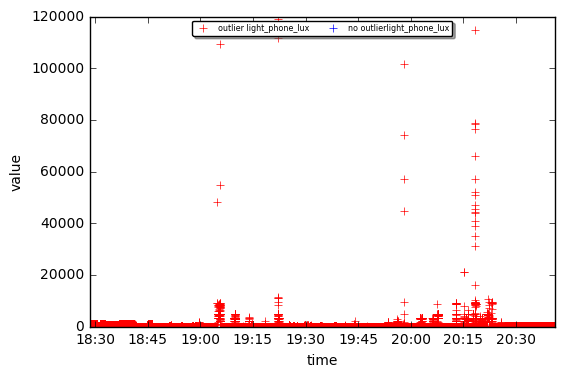

In [5]:

# Determine the columns we want to experiment on.
outlier_columns = [ 'light_phone_lux']

# Create the outlier classes.
OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()

for col in outlier_columns:
    #dataset = OutlierDistr.chauvenet(dataset, col,100)
    #DataViz.plot_binary_outliers(dataset, col, col + '_outlier')
    dataset = OutlierDistr.mixture_model(dataset, col,3,1)
    DataViz.plot_binary_outliers(dataset, col, col + '_mixture')
    #DataViz.plot_dataset(dataset, [col, col + '_mixture'], ['exact','exact'], ['line', 'points'])
    # This requires:
    # n_data_points * n_data_points * point_size =
    # 31839 * 31839 * 64 bits = ~8GB available memory
#     try:
#         dataset = OutlierDist.simple_distance_based(dataset, [col], 'euclidean', 0.01, 0.99)
#         DataViz.plot_binary_outliers(dataset, col, 'simple_dist_outlier')
#     except MemoryError as e:
#         print('Not enough memory available for simple distance-based outlier detection...')
#         print('Skipping.')
    
#     try:
#         dataset = OutlierDist.local_outlier_factor(dataset, [col], 'euclidean', 50)
#         DataViz.plot_dataset(dataset, [col, 'lof'], ['exact','exact'], ['line', 'points'])
#     except MemoryError as e:
#         print('Not enough memory available for lof...')
#         print('Skipping.')
#     # Remove all the stuff from the dataset again.
    cols_to_remove = [col + '_outlier', col + '_mixture', 'simple_dist_outlier', 'lof']
    for to_remove in cols_to_remove:
        if to_remove in dataset:
            del dataset[to_remove]